1. The "Messy Retail Audit"

Scenario: You receive a raw CSV dump from a legacy retail system. Columns have mixed types, 'null' text strings, and formatting errors.

Tasks:

Identify and unify 4 different types of missing value markers (e.g., n/a, -, ?, NaN).

Convert Date columns from object to datetime (handling mixed formats like DD-MM-YYYY and MM/DD/YYYY).

Clean the Price column (remove currency symbols $, € and convert to float).

Deduplicate rows based on TransactionID but keep the most recent entry.

Dataset: Sample Superstore Dataset (Note: You may need to manually introduce errors like NaN or bad formatting to practice cleaning, or use the "Dirty Data" practice sets on Kaggle).

Alternative: I can generate a Python script to create a "dirty" CSV for you if you choose this task.

In [43]:
# %pip install kagglehub

# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("bravehart101/sample-supermarket-dataset")

# print("Path to dataset files:", path)

In [44]:
src="./datasets/bravehart101/sample-supermarket-dataset/versions/1"

In [45]:
import pandas as pd
df = pd.read_csv(src+"/SampleSuperstore.csv")
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [46]:
df.shape

(9994, 13)

In [47]:
df.size

129922

In [48]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [50]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [51]:
df.describe(include='object')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9994,9994,9994,9994,9994,9994,9994,9994
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5968,5191,9994,915,2001,3203,6026,1523


In [52]:
print("Ship Mode:", df["Ship Mode"].value_counts(),end="\n\n")
print("Segment:", df["Segment"].value_counts(),end="\n\n")
print("Country:", df["Country"].value_counts())

Ship Mode: Ship Mode
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: count, dtype: int64

Segment: Segment
Consumer       5191
Corporate      3020
Home Office    1783
Name: count, dtype: int64

Country: Country
United States    9994
Name: count, dtype: int64


In [53]:
print("City:", df["City"].value_counts().keys())

City: Index(['New York City', 'Los Angeles', 'Philadelphia', 'San Francisco',
       'Seattle', 'Houston', 'Chicago', 'Columbus', 'San Diego', 'Springfield',
       ...
       'Waterloo', 'Goldsboro', 'Davis', 'Atlantic City', 'Normal', 'Abilene',
       'Montebello', 'Kissimmee', 'Danbury', 'Springdale'],
      dtype='object', name='City', length=531)


In [54]:
print("State:", df["State"].value_counts().keys())

State: Index(['California', 'New York', 'Texas', 'Pennsylvania', 'Washington',
       'Illinois', 'Ohio', 'Florida', 'Michigan', 'North Carolina', 'Arizona',
       'Virginia', 'Georgia', 'Tennessee', 'Colorado', 'Indiana', 'Kentucky',
       'Massachusetts', 'New Jersey', 'Oregon', 'Wisconsin', 'Maryland',
       'Delaware', 'Minnesota', 'Connecticut', 'Missouri', 'Oklahoma',
       'Alabama', 'Arkansas', 'Rhode Island', 'Utah', 'Mississippi',
       'South Carolina', 'Louisiana', 'Nevada', 'Nebraska', 'New Mexico',
       'Iowa', 'New Hampshire', 'Kansas', 'Idaho', 'Montana', 'South Dakota',
       'Vermont', 'District of Columbia', 'Maine', 'North Dakota',
       'West Virginia', 'Wyoming'],
      dtype='object', name='State')


In [55]:
print("Region:", df["Region"].value_counts(),end="\n\n")
print("Category:", df["Category"].value_counts())

Region: Region
West       3203
East       2848
Central    2323
South      1620
Name: count, dtype: int64

Category: Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64


In [56]:
print("Sub-Category:", df["Sub-Category"].value_counts())

Sub-Category: Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64


In [57]:
print("City:", df["City"].nunique())

City: 531


In [58]:
df.duplicated().value_counts()

False    9977
True       17
Name: count, dtype: int64

In [59]:
df.drop_duplicates(inplace=True)
df.duplicated().value_counts()

False    9977
Name: count, dtype: int64

In [60]:
df.loc[df['Sales'] == df['Sales'].max()]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
2697,Standard Class,Home Office,United States,Jacksonville,Florida,32216,South,Technology,Machines,22638.48,6,0.5,-1811.0784


In [61]:
df.loc[df['Sales'] == df['Sales'].min()]

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
4101,Standard Class,Consumer,United States,Houston,Texas,77095,Central,Office Supplies,Appliances,0.444,1,0.8,-1.11


Original Row Count: 9977
Clean Row Count:    8810
Outliers Removed:   1167


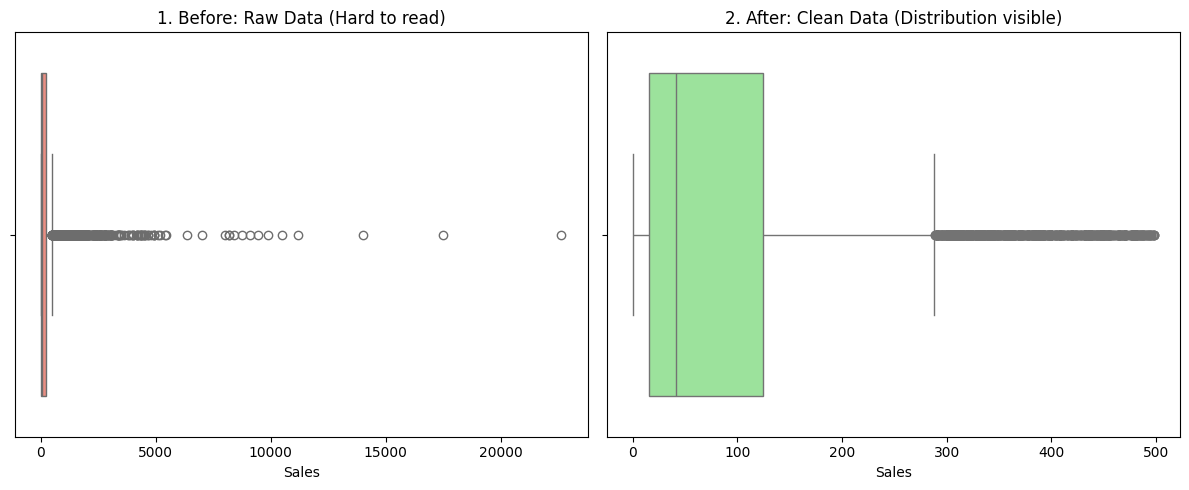

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# --- STEP 1: Visualize First ---
# We use a Boxplot because it is designed specifically to spot outliers
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['Sales'], color='salmon')
plt.title("1. Before: Raw Data (Hard to read)")

# --- STEP 2: Find & Remove ---
# We use the IQR (Interquartile Range) method to mathematically define an outlier
Q1 = df['Sales'].quantile(0.25)
Q3 = df['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove them
df_clean_sales = df[(df['Sales'] >= lower_bound) & (df['Sales'] <= upper_bound)]

print(f"Original Row Count: {len(df)}")
print(f"Clean Row Count:    {len(df_clean_sales)}")
print(f"Outliers Removed:   {len(df) - len(df_clean_sales)}")
# --- STEP 3: Visualize Again ---
plt.subplot(1, 2, 2)
sns.boxplot(x=df_clean_sales['Sales'], color='lightgreen')
plt.title("2. After: Clean Data (Distribution visible)")

plt.tight_layout()
plt.show()

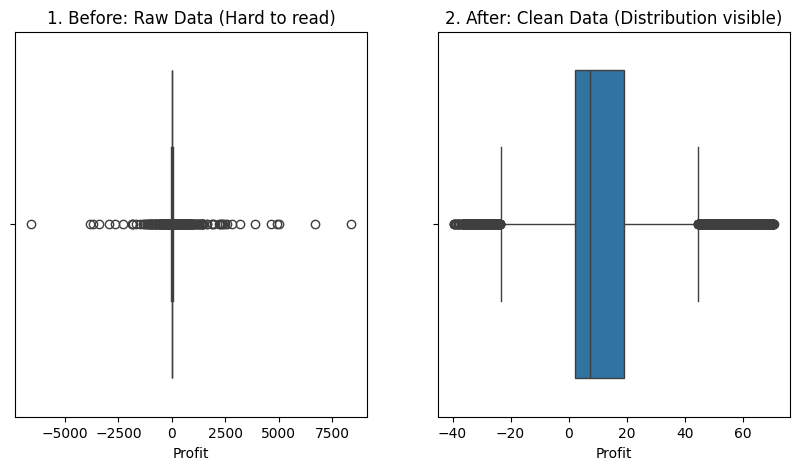

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax=plt.subplots(1,2,figsize=(10,5))
sns.boxplot(x=df['Profit'],ax=ax[0])
ax[0].set_title('1. Before: Raw Data (Hard to read)')
ax[0].set_xlabel('Profit')

Q1=df['Profit'].quantile(0.25)
Q3=df['Profit'].quantile(0.75)
IQR= Q3-Q1
lower_bound= Q1 - 1.5*IQR
upper_bound= Q3 + 1.5*IQR
df_clean_Profit= df[(df['Profit']>= lower_bound) & (df['Profit']<=upper_bound)]

sns.boxplot(x=df_clean_Profit['Profit'],ax=ax[1])
ax[1].set_title('2. After: Clean Data (Distribution visible)')
ax[1].set_xlabel('Profit')
plt.show()

In [64]:
df.describe(include='number')

,Postal Code,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.000000,9977.00000
mean,55154.964117,230.148902,3.790719,0.156278,28.69013
std,32058.266816,623.721409,2.226657,0.206455,234.45784
min,1040.000000,0.444000,1.000000,0.000000,-6599.97800
25%,23223.000000,17.300000,2.000000,0.000000,1.72620
50%,55901.000000,54.816000,3.000000,0.200000,8.67100
75%,90008.000000,209.970000,5.000000,0.200000,29.37200
max,99301.000000,22638.480000,14.000000,0.800000,8399.97600


In [65]:
df.describe(include='object')

,Ship Mode,Segment,Country,City,State,Region,Category,Sub-Category
count,9977,9977,9977,9977,9977,9977,9977,9977
unique,4,3,1,531,49,4,3,17
top,Standard Class,Consumer,United States,New York City,California,West,Office Supplies,Binders
freq,5955,5183,9977,914,1996,3193,6012,1522


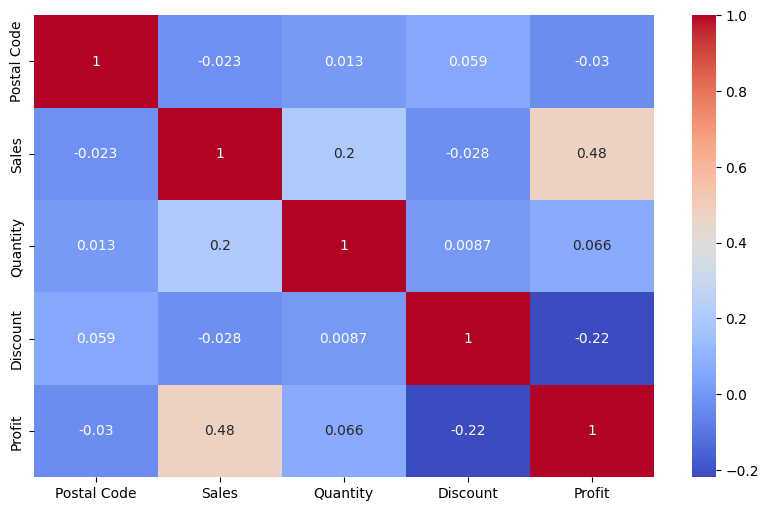

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt
numeric_df = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.show()


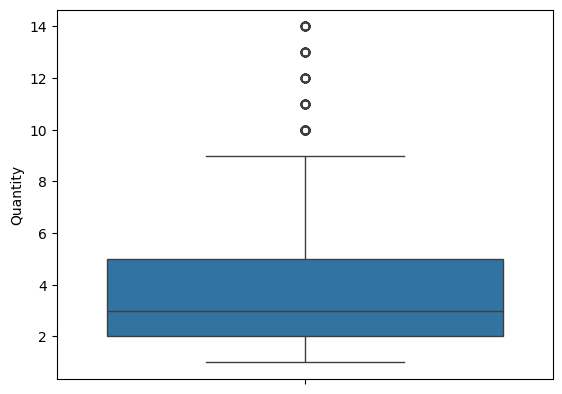

In [68]:
sns.boxplot(df['Quantity'])
plt.show()

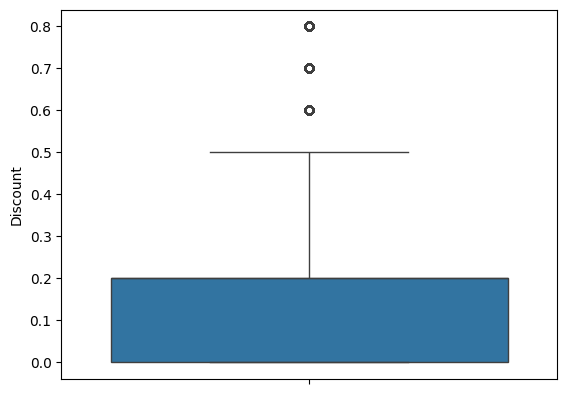

In [69]:
sns.boxplot(df['Discount'])
plt.show()

In [76]:
total_sales=df["Sales"].sum()
total_profit=df["Profit"].sum()
total_quantity=df["Quantity"].sum()
total_discount=df["Discount"].sum()

In [77]:
df.head(0).dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [78]:
df["Ship Mode"].value_counts()

Ship Mode
Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: count, dtype: int64

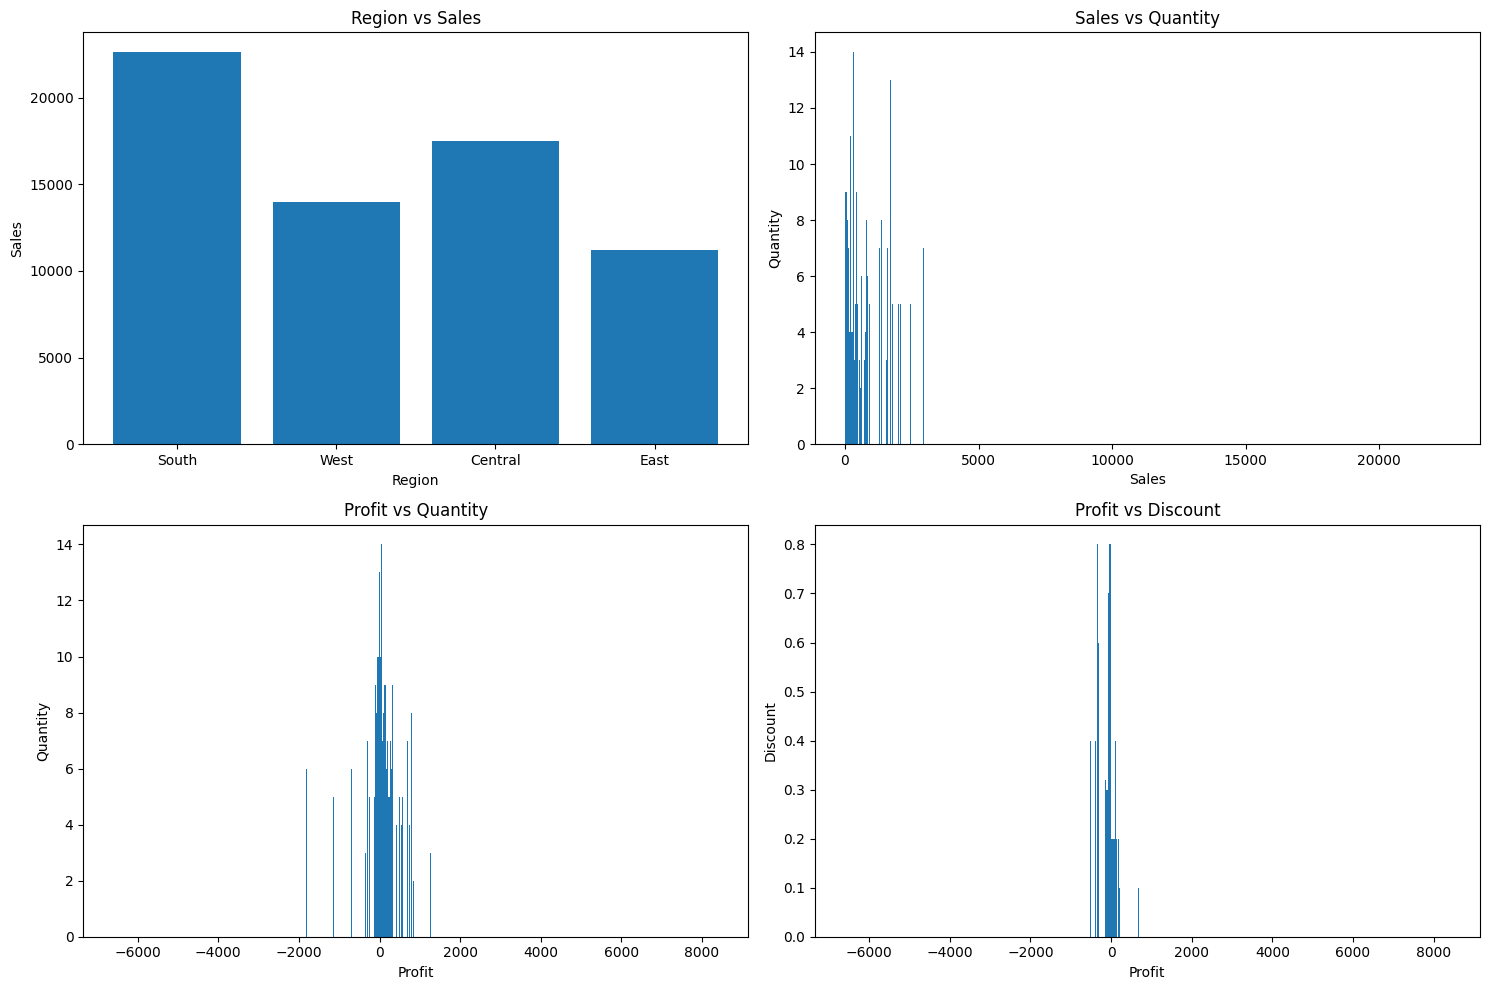

In [106]:
import matplotlib.pyplot as plt

fig,axes= plt.subplots(2,2,figsize=(15,10))

axes[0,0].bar(df['Region'],df['Sales'],data=df)
axes[0,0].set_xlabel("Region")
axes[0,0].set_ylabel("Sales")
axes[0,0].set_title("Region vs Sales")

axes[0,1].bar(df['Sales'],df['Quantity'],data=df)
axes[0,1].set_xlabel("Sales")
axes[0,1].set_ylabel("Quantity")
axes[0,1].set_title("Sales vs Quantity")

axes[1,0].bar(df['Profit'],df['Quantity'],data=df)
axes[1,0].set_xlabel("Profit")
axes[1,0].set_ylabel("Quantity")
axes[1,0].set_title("Profit vs Quantity")

axes[1,1].bar(df['Profit'],df['Discount'],data=df)
axes[1,1].set_xlabel("Profit")
axes[1,1].set_ylabel("Discount")
axes[1,1].set_title("Profit vs Discount")

plt.tight_layout()
plt.show()